In [57]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D, Dense, Flatten
from tensorflow.keras.optimizers import SGD
from keras.datasets import mnist
import matplotlib.pyplot as plt

In [58]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [59]:
print(x_train.shape)
print(y_train.shape)

(60000, 28, 28)
(60000,)


In [60]:
x_train[:10]

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

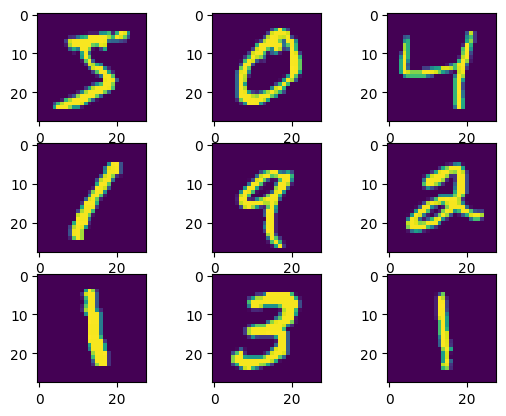

In [61]:
for i in range(9):
  plt.subplot(330 + 1 + i)
  plt.imshow(x_train[i])
plt.show()

In [62]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)

In [63]:
y_train[:4]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [64]:
y_test = to_categorical(y_test)

In [65]:
def define_model():
  model = Sequential()
  model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer="he_uniform", input_shape=(28,28,1)))
  model.add(MaxPooling2D(2,2))
  model.add(Flatten())
  model.add(Dense(100, activation='relu',kernel_initializer="he_uniform"))
  model.add(Dense(10, activation='softmax'))
  opt=SGD(momentum=0.9)
  model.compile(optimizer=opt, loss='CategoricalCrossentropy',metrics=['accuracy'])
  return model

In [66]:
x_train = x_train.reshape((x_train.shape[0],28,28,1))
x_train.shape[0],28,28,1

(60000, 28, 28, 1)

In [67]:
x_train = x_train/255
x_test = x_test/255

In [68]:
model=define_model()

In [69]:
H = model.fit(x_train,y_train, epochs=5, batch_size=32)

Epoch 1/5
1875/1875 [==============================] - 31s 16ms/step - loss: 0.1731 - accuracy: 0.9471
Epoch 2/5
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0579 - accuracy: 0.9822
Epoch 3/5
1875/1875 [==============================] - 31s 17ms/step - loss: 0.0373 - accuracy: 0.9891
Epoch 4/5
1875/1875 [==============================] - 31s 16ms/step - loss: 0.0268 - accuracy: 0.9919
Epoch 5/5
1875/1875 [==============================] - 31s 17ms/step - loss: 0.0177 - accuracy: 0.9949


In [70]:
y_output = model.predict(x_test)

313/313 [==============================] - 2s 5ms/step


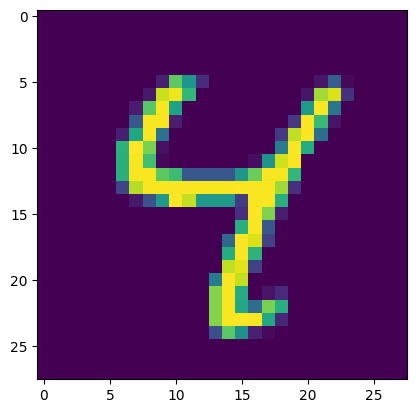

In [75]:
import random
index = random.randint(0,9)
plt.imshow(x_test[index])

In [76]:
pred_num = max(y_output[index])
for i in range(len(y_output[index])):
  if(y_output[index][i] == pred_num):
    print("Predicted number is: ",i)
    break

Predicted number is:  4


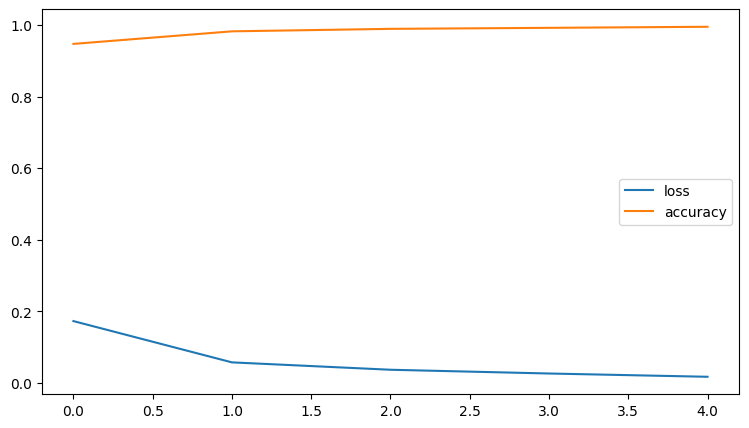

In [77]:
import pandas as pd
pd.DataFrame(H.history).plot(figsize=(9,5))
plt.show()